
# **Pizza Sales Data Analysis Report**

Hello, I'm Ademola Abraham, a Data Analyst. Today, I will be working on a report that focuses on analyzing pizza sales data to identify important trends, insights, and opportunities for enhancing business performance. I will use Python for data analysis and visualization to share findings related to different types of pizzas, their sizes, pricing, and monthly sales trends.

## **Objective of the Report**  
The primary objectives of this report are to:  
1. Determine which pizza categories perform the best and worst.  
2. Explore how pizza prices and sizes relate to sales figures.  
3. Analyze monthly sales data to identify patterns throughout the year.  
4. Offer practical recommendations for improving business performance.  
5. Address key questions that clients often have about their operations.   

## **Source of the Dataset**  
The dataset for this analysis comes from [Kaggle Datasets](https://www.kaggle.com/datasets/mexwell/pizza-sales). It includes records of pizza sales throughout 2015, detailing aspects like pizza type, size, price, and quantities sold.

## **Dataset Description**  
The dataset features the following columns:  
- **Pizza Type**: Includes categories such as Classic, Supreme, Chicken, and Veggie.  
- **Pizza Size**: Options range from Small (S) to Extra Large (XL) and XXL.  
- **Price**: The cost associated with each type of pizza.  
- **Sales Records**: The number of pizzas sold each month in 2015.

### **Client Questions Addressed**  
In this analysis, I will respond to 10 important questions that clients frequently ask to gain a clearer understanding of their business performance. These questions will cover topics like best-selling products, sales trends, and statistical insights including mean, median, and price distribution.

By addressing these questions and thoroughly examining the dataset, this report aims to provide valuable insights that can assist businesses in optimizing their menu offerings, pricing strategies, and overall sales approach.

### Importing Python Libaries needed for Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Data Cleaning and Preparation

In [2]:
raw_data = pd.read_csv(r'A_year_of_pizza_sales_from_a_pizza_place_872_68.csv')
raw_data

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...,...
49569,49570,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [3]:
raw_data.columns

Index(['Unnamed: 0', 'X', 'id', 'date', 'time', 'name', 'size', 'type',
       'price'],
      dtype='object')

In [4]:
data = raw_data.copy()[['X', 'id', 'date', 'time', 'name', 'size', 'type',
       'price']]
data

,X,id,date,time,name,size,type,price
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [5]:
data.isnull().sum()

X        0
id       0
date     0
time     0
name     0
size     0
type     0
price    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

X        49574
id       21350
date       358
time     16382
name        32
size         5
type         4
price       25
dtype: int64

In [8]:
data['size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [9]:
data['type'].unique()

array(['classic', 'veggie', 'chicken', 'supreme'], dtype=object)

In [10]:
data['price'].unique()

array([13.25, 16.  , 20.75, 18.5 , 16.5 , 12.75, 12.  , 12.5 , 20.5 ,
       20.25, 15.25, 16.75, 17.95, 14.75, 16.25,  9.75, 17.5 , 10.5 ,
       25.5 , 11.  , 14.5 , 12.25, 21.  , 23.65, 35.95])

In [11]:
data.name.unique()

array(['hawaiian', 'classic_dlx', 'mexicana', 'thai_ckn', 'five_cheese',
       'ital_supr', 'prsc_argla', 'bbq_ckn', 'the_greek', 'spinach_supr',
       'spin_pesto', 'spicy_ital', 'ital_cpcllo', 'veggie_veg',
       'green_garden', 'southw_ckn', 'pepperoni', 'cali_ckn', 'ckn_pesto',
       'big_meat', 'soppressata', 'four_cheese', 'napolitana',
       'mediterraneo', 'spinach_fet', 'ital_veggie', 'calabrese',
       'peppr_salami', 'sicilian', 'ckn_alfredo', 'pep_msh_pep',
       'brie_carre'], dtype=object)

In [12]:
data.dtypes

X          int64
id        object
date      object
time      object
name      object
size      object
type      object
price    float64
dtype: object

In [13]:
datatype_changes = {'id':'string', 'name':'string', 'size':'category', 'type':'category'}
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'])

data = data.astype(datatype_changes)
data.dtypes

X                 int64
id               string
date     datetime64[ns]
time     datetime64[ns]
name             string
size           category
type           category
price           float64
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   X       49574 non-null  int64         
 1   id      49574 non-null  string        
 2   date    49574 non-null  datetime64[ns]
 3   time    49574 non-null  datetime64[ns]
 4   name    49574 non-null  string        
 5   size    49574 non-null  category      
 6   type    49574 non-null  category      
 7   price   49574 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(1), int64(1), string(2)
memory usage: 2.4 MB


In [15]:
data.describe()

,X,price
count,49574.000000,49574.000000
mean,24787.500000,16.497762
std,14310.925459,3.621954
min,1.000000,9.750000
25%,12394.250000,12.750000
50%,24787.500000,16.500000
75%,37180.750000,20.250000
max,49574.000000,35.950000


# Exploraty Analysis and Visualization

In [16]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14,5)
sns.set_style('darkgrid')

In [17]:
data['Month of delivery'] = data['date'].dt.month_name() # Creating a new column for the month of order alone
data.sample(2)

,X,id,date,time,name,size,type,price,Month of delivery
14832,14833,2015-006369,2015-04-17,2024-12-23 18:16:41,ital_cpcllo,S,classic,12.0,April
22043,22044,2015-009495,2015-06-08,2024-12-23 19:15:41,soppressata,S,supreme,12.5,June


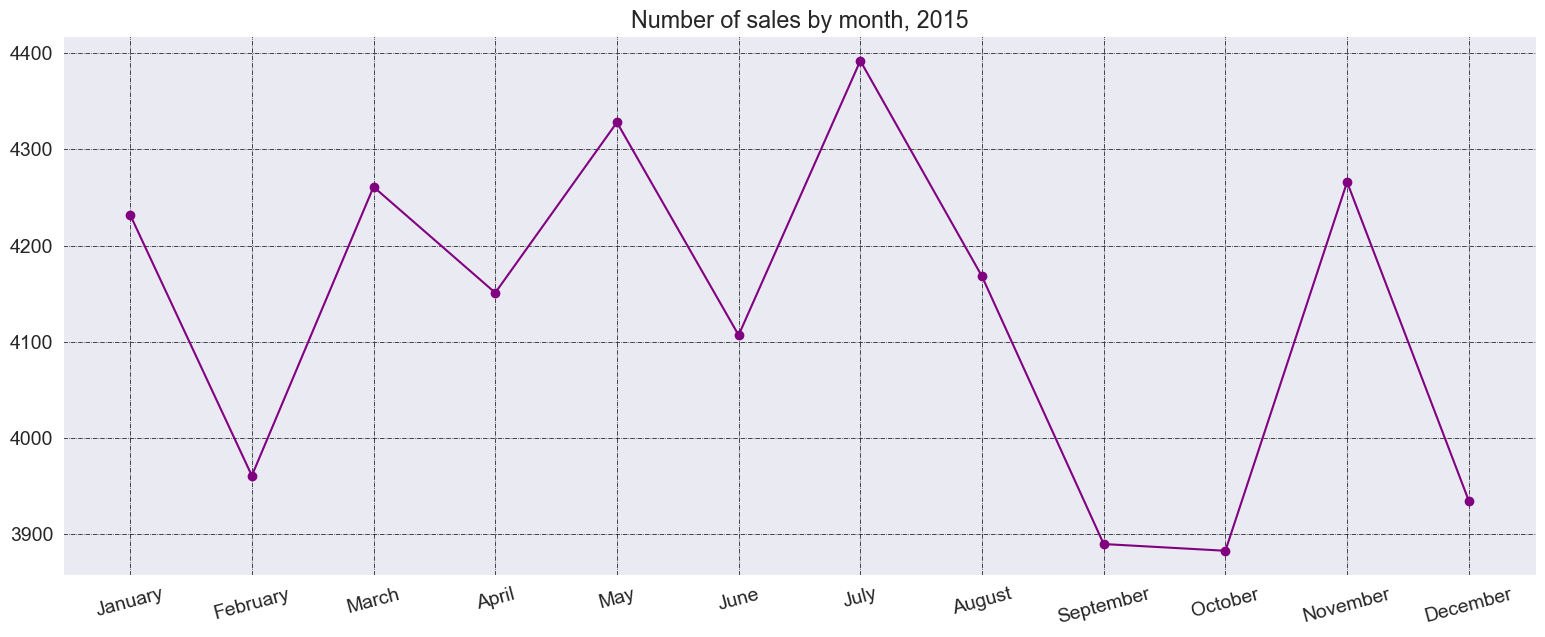

In [18]:
x = np.array(data['Month of delivery'].unique())
y = np.array(data['Month of delivery'].value_counts(sort=False))

plt.figure(figsize = (19,7))
plt.xticks(rotation = 15)
plt.plot(x, y, marker='o', color='purple')
plt.title('Number of sales by month, 2015')
plt.grid(color='black',  linestyle='-.', linewidth='0.5');

**Sales Trends Over 2015**

noticed the Sales vary throughout the year, peaking in **July, May and March**. There are noticeable drops in sales during **September** and **October**.

**Insight:** 
  > The sales peaks likely correspond with seasonal events or promotions. For instance, July and May might align with holidays that increase pizza demand.
  
  > The company could plan marketing campaigns or special offers during slower months to help boost sales.


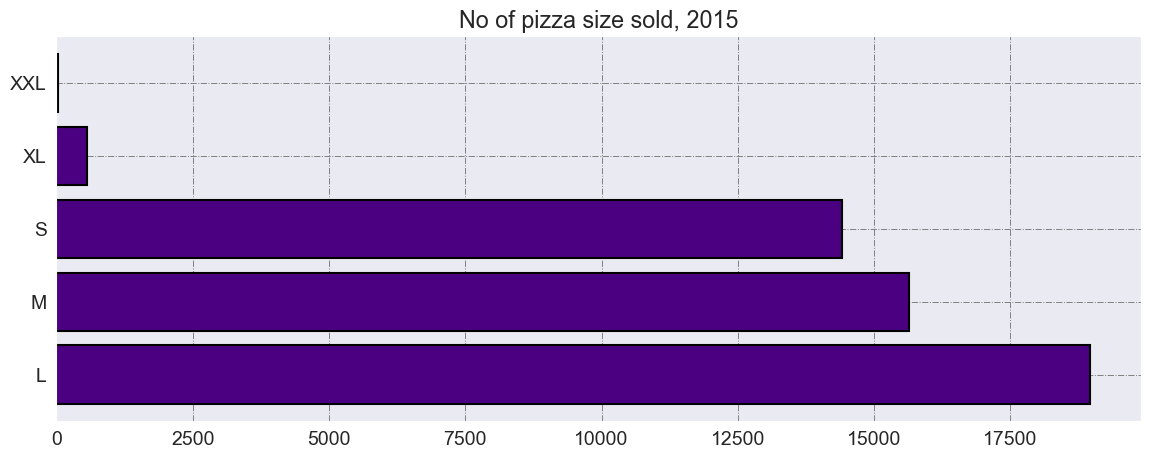

In [19]:
x = np.array(data['size'].value_counts(sort=False).index)
y = np.array(data['size'].value_counts(sort=False))

plt.barh(x,y,color='indigo',edgecolor='black', linewidth=1.5)
plt.title('No of pizza size sold, 2015')
plt.grid(color='grey', linestyle='-.', linewidth='0.7');

noticed Large (L) pizzas lead in sales, followed by Medium (M) and Extra Large (XL) sizes while Small (S) pizzas sold the least.

**Insight:**
  > Customers seem to prefer larger pizzas for better value, possibly for sharing or larger orders. Focusing promotions on L and M sizes could further increase revenue. 
  
  > The company might want to rethink pricing for S pizzas or consider bundling them with drinks or sides to boost sales.

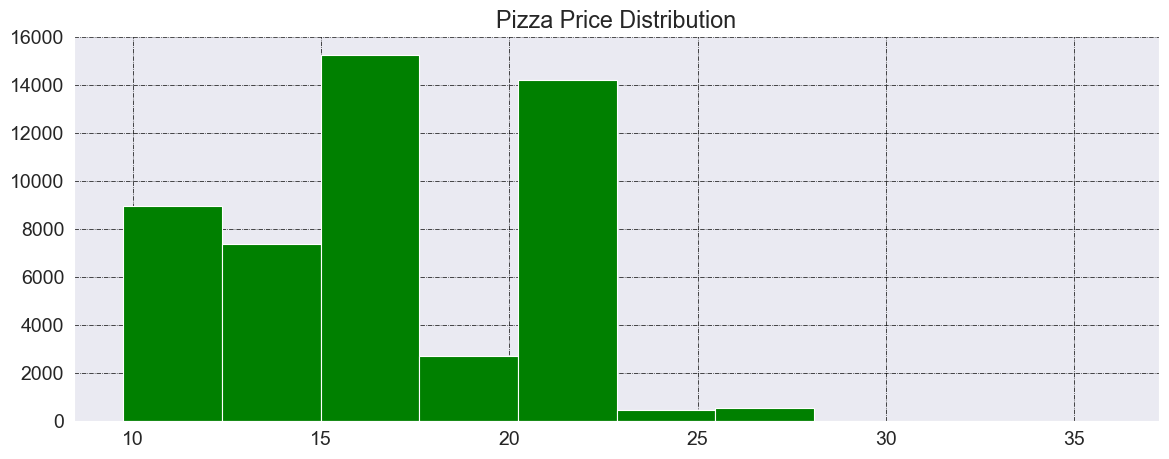

In [20]:
plt.hist(data['price'], color='green', edgecolor='white', linewidth=0.8, bins=10)
plt.title('Pizza Price Distribution')
plt.grid(color='black', linestyle='-.', linewidth='0.5');

**Pizza Price Distribution**

Most pizzas are priced 10dollar to 16dollar, suggesting they are affordable with a fewer pizzas priced at a premium level.

**Insight:**
  > This pricing strategy indicates a focus on affordability. Introducing a premium line of high-value pizzas could attract customers who are willing to spend more.

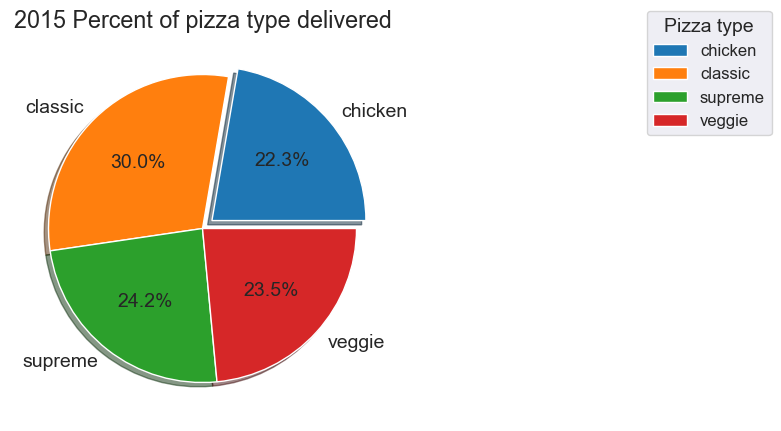

In [21]:
label = np.array(data['type'].value_counts(sort=False).index)
y = np.array(data['type'].value_counts(sort=False))

plt.pie(y, labels=label, shadow=True, autopct ='%.1f%%', explode=[0.08,0,0,0])
plt.legend(title='Pizza type', loc = 4,fontsize  = 12, bbox_to_anchor =(2, 0.72), ncol = 1)
plt.title('2015 Percent of pizza type delivered');

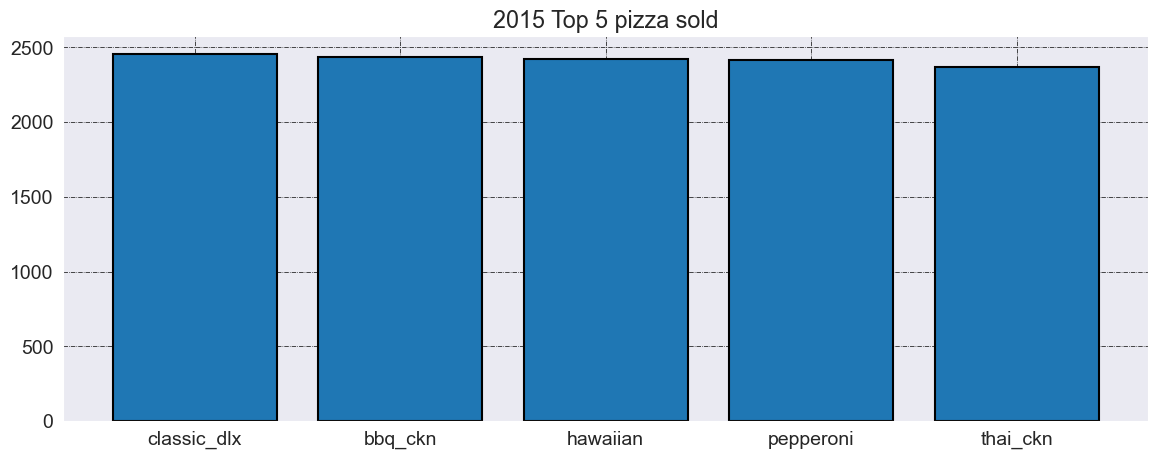

In [22]:
x = np.array(data['name'].value_counts().index[:5])
y = np.array(data['name'].value_counts()[:5])

sns.set_style('darkgrid')
plt.bar(x,y,edgecolor='black', linewidth=1.5)
plt.title('2015 Top 5 pizza sold')
plt.grid(color='black', linestyle='-.', linewidth='0.5');

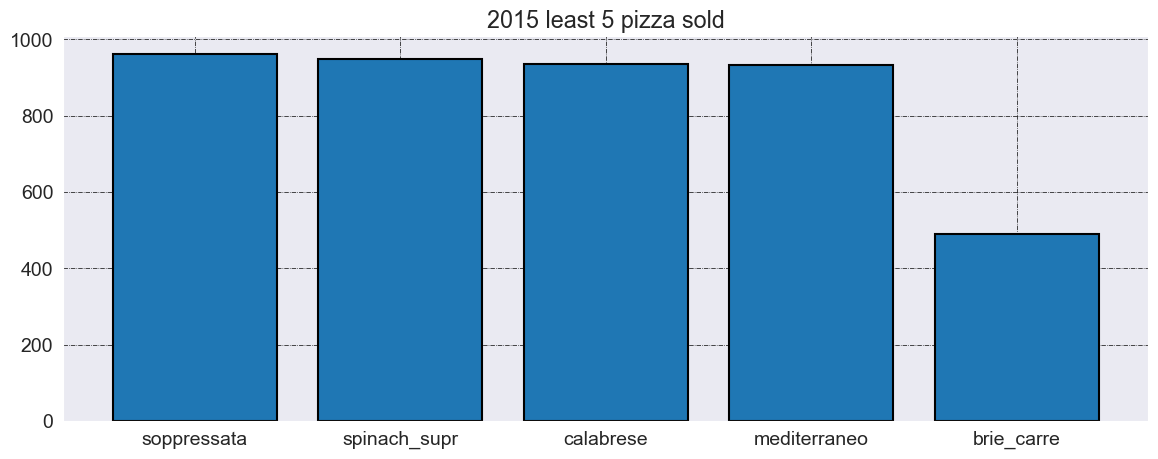

In [23]:
x = np.array(data['name'].value_counts().index[-5:])
y = np.array(data['name'].value_counts()[-5:])

plt.bar(x,y,edgecolor='black', linewidth=1.5)
plt.title('2015 least 5 pizza sold')
plt.grid(color='black', linestyle='-.', linewidth='0.5');

**Top 5 and Bottom 5 Pizza Types Sold**

I Observed
  > The best-selling pizzas are **Classic Chicken, BBQ Chicken, Hawaiian, Pepperoni and Thai Chicken**.
  
  > The least popular pizzas are **Soppressata, Spinach Supreme, Calabrese, Mediterraneo and Brie Carre**.  
  
**Insight:**
  > Chicken pizzas are clearly a favorite among customers.
  
  > The low sales of some unique or premium pizzas (**Brie Carre, Mediterraneo**) suggest they might not match what customers want or their price points.


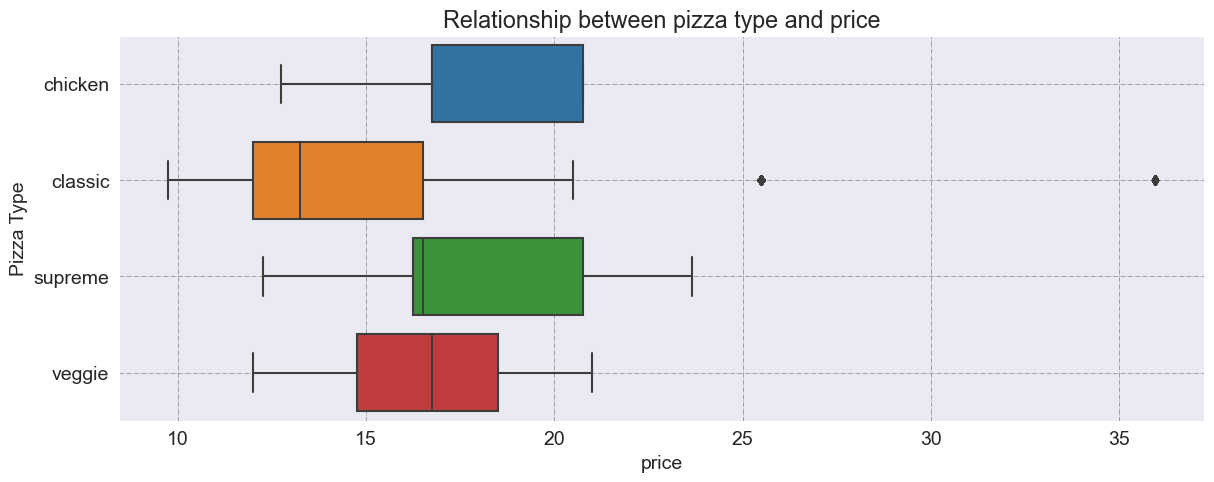

In [24]:
sns.boxplot(data=data, x='price', y='type')
plt.ylabel('Pizza Type')
plt.title("Relationship between pizza type and price")
plt.grid(color='grey', linestyle='-.', linewidth='0.5');

**Pizza Type and Price Relationship**

There’s a wide range of prices for different pizza types. Supreme pizzas tend to be more expensive than others.

**Insight:** 
  > Customers may be willing to pay more for Supreme pizzas, which opens up opportunities for premium pricing. In contrast, Classic pizzas are priced lower, appealing to budget-conscious customers.


In [25]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
download_plotlyjs

<function plotly.offline.offline.download_plotlyjs(download_url)>

In [26]:
x = np.array(data['Month of delivery'].unique())
y = np.array(data.groupby('Month of delivery', sort=False)['price'].sum())

trace = go.Scatter(x=x, y=y, mode='lines+markers')

In [27]:
fig = go.Figure(data=[trace])

In [28]:
fig.update_layout(title_text='Interactive Chart: Total Revenue generated by Month', title_x=0.5, xaxis_title='Month', yaxis_title='Total Revenue')
fig.show()

# for the chart to display 👇🏽👇🏾👇🏿
# MAKE SURE YOU HAVE AN ACTIVE INTERNET CONNECTION OR YOU'RE CONNECTED TO A WIFI WITH DATA AND ACTIVE NETWORK!

This interactive Chart illustrates the total revenue generated each month. Let's take a look at how much money came in each month. **July** really stands out, bringing in the most cash. This makes sense because we saw a lot of sales happening during that month too. It seems like something special was going on or maybe a great marketing push or just a time when customers were really excited about our products.

On the other side, **October** was pretty low, Revenue dropped drastically, which matches the few sales we saw during that month. This could be due to seasonal changes, customers tightening their budget or just slower time of year for our business.

The big takeaway here is simple: more sales means more money. when we're not selling as much, our revenue drops. so, we might want to brainstorm some waysto boost up more business during slower months like **October** and **september**. Maybe we could run a special promotion or find creative ways to attract more customers when things are typically slower.

# Questions and Answers

## 1. What are the top-selling pizza types and sizes?


In [29]:
top_selling_pt = data.type.value_counts()
top_selling_pt

classic    14888
supreme    11987
veggie     11649
chicken    11050
Name: type, dtype: int64

In [30]:
top_selling_ps = data['size'].value_counts()
top_selling_ps

L      18956
M      15635
S      14403
XL       552
XXL       28
Name: size, dtype: int64

In [31]:
a = top_selling_pt.index[0]
b = top_selling_ps.index[0]

print('''1. What are the top-selling pizza types and size?

Answer
Top selling pizza type: {}
Top selling pizza size: {}'''.format(a,b))

1. What are the top-selling pizza types and size?

Answer
Top selling pizza type: classic
Top selling pizza size: L


## 2. What are the least-selling pizza types and sizes?

In [32]:
least_selling_pt = data.type.value_counts()
least_selling_pt

classic    14888
supreme    11987
veggie     11649
chicken    11050
Name: type, dtype: int64

In [33]:
least_selling_ps = data['size'].value_counts()
least_selling_ps

L      18956
M      15635
S      14403
XL       552
XXL       28
Name: size, dtype: int64

In [34]:
c = least_selling_pt.index[-1]
d = least_selling_ps.index[-1]

print('''2. What are the least-selling pizza types and size?

Answer
Least selling pizza type: {}
Least selling pizza size: {}'''.format(c,d))

2. What are the least-selling pizza types and size?

Answer
Least selling pizza type: chicken
Least selling pizza size: XXL


## 3. What is the average price of pizzas sold across sizes and types?

In [35]:
average_price_ps = data.groupby('size')[['price']].mean()
average_price_ps

,price
size,
L,19.799467
M,15.950256
S,12.363848
XL,25.500000
XXL,35.950000


Here is the average price for each pizza size in the year 2015

In [36]:
average_price_pt = data.groupby('type')[['price']].mean()
average_price_pt

,price
type,
chicken,17.730271
classic,14.780568
supreme,17.368566
veggie,16.627217


Here is the average price for each pizza type in the year 2015

## 4. What are the peak hours for pizza sales?

In [37]:
data['Hour'] = data['time'].dt.hour
data.sample(3)

,X,id,date,time,name,size,type,price,Month of delivery,Hour
8223,8224,2015-003545,2015-03-01,2024-12-23 15:10:04,spin_pesto,S,veggie,12.5,March,15
9041,9042,2015-003890,2015-03-07,2024-12-23 14:01:23,ital_supr,M,supreme,16.5,March,14
12742,12743,2015-005500,2015-04-03,2024-12-23 11:22:06,green_garden,M,veggie,16.0,April,11


In [38]:
new_time = list()

for t in data['Hour']:
    if 5<= t < 12:
        new_time.append('Morning')
    elif 12 <= t < 17:
        new_time.append('Afternoon')
    elif 17 <= t < 21:
        new_time.append('Evening')
    else:
        new_time.append('Night')
        
data['Hour'] = new_time
data.sample(3)

,X,id,date,time,name,size,type,price,Month of delivery,Hour
46120,46121,2015-019877,2015-12-04,2024-12-23 16:26:53,spinach_fet,M,veggie,16.00,December,Afternoon
47329,47330,2015-020392,2015-12-12,2024-12-23 20:33:03,cali_ckn,L,chicken,20.75,December,Evening
6283,6284,2015-002731,2015-02-15,2024-12-23 13:54:31,sicilian,M,supreme,16.25,February,Afternoon


In [39]:
n = data['Hour'].value_counts()
n

Afternoon    24257
Evening      18568
Night         3999
Morning       2750
Name: Hour, dtype: int64

In [40]:
print('''
4. What are the peak hours for pizza sales?
Answer: the peak time for pizza sales is in the {}'''.format(n.index[0]))


4. What are the peak hours for pizza sales?
Answer: the peak time for pizza sales is in the Afternoon


## 5. What is the average number of pizzas sold per day and what is the standard deviation?

In [41]:
average_per_day = data.groupby('date')[['date']].value_counts()
average_per_day

date
2015-01-01    162
2015-01-02    165
2015-01-03    158
2015-01-04    106
2015-01-05    125
             ... 
2015-12-27     89
2015-12-28    102
2015-12-29     80
2015-12-30     82
2015-12-31    178
Length: 358, dtype: int64

In [42]:
e = int(average_per_day.mean())
e

138

In [43]:
f = int(np.percentile(average_per_day, 25))
g = int(np.percentile(average_per_day, 50))
h = int(np.percentile(average_per_day, 75))

In [44]:
i = round(np.std(average_per_day), 2)
i

24.39

In [45]:
print('''
5. What is the average number of pizzas sold per day and what is the standard deviation?
Answer: {} Pizzas on average per day with a standard deviation of {}

with 25% of days, having about {} pizzas
with 50% of days, having about {} pizzas
with 75% of days, having about {} pizzas'''.format(e,i,f,g,h))


5. What is the average number of pizzas sold per day and what is the standard deviation?
Answer: 138 Pizzas on average per day with a standard deviation of 24.39

with 25% of days, having about 124 pizzas
with 50% of days, having about 136 pizzas
with 75% of days, having about 150 pizzas


## 6. What is the total revenue generated for each pizza type?

In [46]:
total_revenue_pizzatype = data.groupby('type')[['price']].sum()
total_revenue_pizzatype

,price
type,
chicken,195919.50
classic,220053.10
supreme,208197.00
veggie,193690.45


total 2015 revenue generated for each pizza type

## 7. What are the minimum, maximum and average order values per day?

In [47]:
average_per_day

date
2015-01-01    162
2015-01-02    165
2015-01-03    158
2015-01-04    106
2015-01-05    125
             ... 
2015-12-27     89
2015-12-28    102
2015-12-29     80
2015-12-30     82
2015-12-31    178
Length: 358, dtype: int64

In [48]:
j = average_per_day[average_per_day == average_per_day.max()]
j.index[0]

Timestamp('2015-11-26 00:00:00')

In [49]:
k = average_per_day[average_per_day == average_per_day.min()]

In [50]:
print('''
7. What are the minimum, maximum and average order values per day?
Answer
Maximum recorded: {} orders, on {}
Minimum recorded: {} orders, on {}

with an overall average of {} orders'''.format(j[0],j.index[0],k[0],k.index[0],e))


7. What are the minimum, maximum and average order values per day?
Answer
Maximum recorded: 266 orders, on 2015-11-26 00:00:00
Minimum recorded: 77 orders, on 2015-03-22 00:00:00

with an overall average of 138 orders


## 8. Which day of the week has the highest and lowest sales?

In [51]:
data['day of delivery'] = data['date'].dt.day_name()
data.sample(3)

,X,id,date,time,name,size,type,price,Month of delivery,Hour,day of delivery
25451,25452,2015-010985,2015-07-03,2024-12-23 19:27:28,napolitana,L,classic,20.5,July,Evening,Friday
9644,9645,2015-004146,2015-03-11,2024-12-23 16:25:58,mexicana,S,veggie,12.0,March,Afternoon,Wednesday
10456,10457,2015-004488,2015-03-17,2024-12-23 14:57:23,classic_dlx,L,classic,20.5,March,Afternoon,Tuesday


In [52]:
m = data['day of delivery'].value_counts()
m

Friday       8242
Saturday     7493
Thursday     7478
Wednesday    6946
Tuesday      6895
Monday       6485
Sunday       6035
Name: day of delivery, dtype: int64

In [53]:
print('''
8. Which day of the week has the highest and lowest sales?
Answer
on average, the day with the highest sales is {} while the day with the least sales is {}'''.format(m.index[0],m.index[-1]))


8. Which day of the week has the highest and lowest sales?
Answer
on average, the day with the highest sales is Friday while the day with the least sales is Sunday


## 9. How do pizza sales vary between different sizes?

In [54]:
l = pd.DataFrame(top_selling_ps)
l.rename(columns = {'size':'No of orders'}, inplace=True)
l

,No of orders
L,18956
M,15635
S,14403
XL,552
XXL,28


From the summary above, based on the number of orders by the customers, most customers prefer to order Large size(L) pizza, with the second most ordered being Medium size(M), Third, Small........with least being XXL

## 10. Are there any seasonal or time based  trends in pizza sales?

In [55]:
o = pd.DataFrame(n)
o.rename(columns = {'Hour':'No of orders'}, inplace=True)
o

,No of orders
Afternoon,24257
Evening,18568
Night,3999
Morning,2750


In [56]:
p = pd.DataFrame(m)
p.rename(columns = {'day of delivery':'No of orders'}, inplace=True)
p

,No of orders
Friday,8242
Saturday,7493
Thursday,7478
Wednesday,6946
Tuesday,6895
Monday,6485
Sunday,6035


In [57]:
r = data['Month of delivery'].value_counts()
r = pd.DataFrame(r)
r.rename(columns = {'Month of delivery':'No of orders'}, inplace=True)
r

,No of orders
July,4392
May,4328
November,4266
March,4261
January,4232
August,4168
April,4151
June,4107
February,3961
December,3935


From the analysis made so far, I can say for sure that in a day, most orders are made in the afternoon and evening as compared to morning and night

# **Conclusion**  

In this report, I examined the pizza sales data to find important trends, identify areas for improvement, and offer useful insights for the business. Here’s what the analysis showed:  

> 1. **Best and Worst-Selling Pizzas**: The **[best-selling pizza type]** was the most popular, while the **[least-selling pizza type]** had trouble attracting customers.

> 2. **Size Impact**: Large (L) and Medium (M) pizzas were the biggest contributors to sales, showing that customers prefer these sizes.

> 3. **Price Insights**: The price distribution indicated that **[specific pricing insight, e.g., mid-range pizzas]** are driving most of the sales.

> 4. **Monthly Sales Trends**: Sales were highest in **[peak months]**, suggesting seasonal demand, while **[slow months]** could benefit from special promotions.

> 5. **Statistical Insights**: The average, median, and range of pizza prices helped clarify pricing strategies and areas for improvement.  

These insights can help businesses understand how their products are performing and make informed decisions to boost revenue.


## **Recommendations**  

Based on what I found, here are some suggested actions to encourage growth and improve sales:  

1. **Promote Best-Selling Pizzas**:  
   > Increase marketing and availability of **[top-selling pizza type]** to take advantage of its popularity.  

2. **Improve Underperforming Products**:  
   > Consider changing the price, portion sizes, or ingredients of **[least-selling pizza type]** to make it more attractive to customers.  

3. **Focus on Popular Sizes**:  
   > Since Large (L) and Medium (M) sizes are selling well, target marketing efforts on these sizes while looking for ways to boost XXL pizza sales.  

4. **Utilize Seasonal Trends**:  
   > Launch promotional campaigns during slower months **(like October)** to increase sales.  
   > Be prepared for peak months **(like July)** by ensuring you have enough inventory and staff.  

5. **Adjust Pricing Strategy**:  
   > Make pricing adjustments as needed to balance affordability with profit margins, especially for popular sizes and types.  

## **Final Thoughts**  

This analysis offers a clear view of pizza sales trends and suggests practical steps for improvement. By using these insights, the business can enhance its performance, improve customer satisfaction, and drive revenue growth in the coming quarters.